## Klassifikation mit Preprocessing¶
Zunächst werden hier alle nötigen Schritte unternommen um aus einen Datensatz ein typisches Klassifikationsmodell zu trainieren. Dabei sind folgende Punkte entscheidend:

1. Import aller nötigen Bibliotheken
2. Import des Datensatzes und Überführung in ein Pandas-Dataframe
3. Datensatz verstehen
... so weit so bekannt, doch hin und wieder ist der Datensatz nicht vollständig oder fehlerhaft. Evtl. auch zu groß und muss daher überarbeitet werden.






Wandlung der Klassen in numerische Werte
Splitten des Datensatzes in Training- und Testdaten
Trainieren des gewählten Modells und Überprüfung des Trainingsdatensatzes anhand der Loss-Kurve und der Confusion Matrix
Überprüfen des Testdatensatzes. Dieser gibt Auskunft darüber ob das Modell ausreichend verallgemeinert.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 Import der Bibliotheken und Daten
In einem ersten Schritt werden alle notwendigen Bibliotheken importiert. Im Anschluß wird der entsprechende Datensatz importiert und untersucht, ob alles soweit richtig bezogen wurde.

In [ ]:
# 1. Import aller nötigen Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve
#from scikitplot.metrics import plot_roc,auc
#from scikitplot.metrics import plot_precision_recall


In [ ]:
# 2. Import des Datensatzes und Überführung in ein Pandas-Dataframe
#df = pd.read_csv('data/iris_dirty.csv', delimiter=',')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/iris_dirty.csv', delimiter=',')
df.head()

,5.1,3.5,1.4,2 mm,Iris-setosa
0,4.9,3.0,1.4,2 mm,Iris-setosa
1,4.7,3.2,1.3,2 mm,Iris-setosa
2,4.6,3.1,1.5,2 mm,Iris-setosa
3,5.0,3.6,1.4,2 mm,Iris-setosa
4,5.4,3.9,1.7,4 mm,Iris-setosa


In [ ]:
# Beim Import fällt auf, dass der Header fehlt. Auch sind im 4 Feature mm-Angaben mit an Bord.
# Zuerst korrigiert man den Header und das Einlesen des dataframe wie folgt
#df = pd.read_csv('data/iris_dirty.csv', header=None, encoding='iso-8859-15', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/iris_dirty.csv', header=None, encoding='iso-8859-15', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa


## 2.2 Vorabuntersuchung auf Korrekturmaßnahmen
Im Folgenden wird untersucht, welche Korrekturmaßnahmen erforderlich sind. Denkbar wären:
1. Missing Values
2. Zahlendreher
3. Falsche Einheiten und oder Werte
4. Dubletten
5. Ausreisser die den Datensatz verzerren
6. Feature Korrelationen und somit eine Dimensionsreduktion

In [ ]:
# Nun mal den gesamten Datensatz ausgeben
# Mit folgendem Befehl wird der komplette Dataframe angezeigt. Mit Vorsicht zu genießen.
pd.set_option("display.max_rows", None, "display.max_columns", None)
df
# In Zeile 82 ist bei Feature 3 ein fehlender Wert
# In der Spalte petal width stehen mm-Angaben
# Namensdreher, Zahlendreher sollten auch betrachtet werden

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
5,5.4,3.9,1.7,4 mm,Iris-setosa
6,4.6,3.4,1.4,3 mm,Iris-setosa
7,5.0,3.4,1.5,2 mm,Iris-setosa
8,4.4,2.9,1.4,2 mm,Iris-setosa
9,4.9,3.1,1.5,1 mm,Iris-setosa


In [ ]:
# Fehlende Werte ermitteln
df.count()

sepal length    151
sepal width     150
petal length    151
petal width     151
class           151
dtype: int64

In [ ]:
# In sepal width fehlt ein Wert
df['sepal width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
30     3.1
31     3.4
32     4.1
33     4.2
34     3.1
35     3.2
36     3.5
37     3.1
38     3.0
39     3.4
40     3.5
41     2.3
42     3.2
43     3.5
44     3.8
45     3.0
46     3.8
47     3.2
48     3.7
49     3.3
50     3.2
51     3.2
52     3.1
53     2.3
54     2.8
55     2.8
56     3.3
57     2.4
58     2.9
59     2.7
60     2.0
61     3.0
62     2.2
63     2.9
64     2.9
65     3.1
66     3.0
67     2.7
68     2.2
69     2.5
70     3.2
71     2.8
72     2.5
73     2.8
74     2.9
75     3.0
76     2.8
77     3.0
78     2.9
79     2.6
80     2.4
81     2.4
82     NaN
83     2.7
84     3.0
85     3.4
86     3.1
87     2.3
88     3.0
89     2.5
90     2.6

In [ ]:
# gezielt diese(n) fehlende(n) Wert finden
df[df['sepal width'].isnull()]

,sepal length,sepal width,petal length,petal width,class
82,5.8,NaN,3.9,12 mm,Iris-versicolor


In [ ]:
# Es handelt sich um einen Wert aus der Klasse 1 also Versicolor.
# Nehmen wir einen Durchschnittswert dieser Klasse und fügen den Durchschnitt hier hinzu
iris_versicolor = df[df['class']== "Iris-versicolor"]
iris_versicolor

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,14 mm,Iris-versicolor
51,6.4,3.2,4.5,15 mm,Iris-versicolor
52,6.9,3.1,4.9,15 mm,Iris-versicolor
53,5.5,2.3,4.0,13 mm,Iris-versicolor
54,6.5,2.8,4.6,15 mm,Iris-versicolor
55,5.7,2.8,4.5,13 mm,Iris-versicolor
56,6.3,3.3,4.7,16 mm,Iris-versicolor
57,4.9,2.4,3.3,10 mm,Iris-versicolor
58,6.6,2.9,4.6,13 mm,Iris-versicolor
59,5.2,2.7,3.9,14 mm,Iris-versicolor


In [ ]:
iris_versicolor_sepal_width = iris_versicolor['sepal width']
iris_versicolor_sepal_width

50     3.2
51     3.2
52     3.1
53     2.3
54     2.8
55     2.8
56     3.3
57     2.4
58     2.9
59     2.7
60     2.0
61     3.0
62     2.2
63     2.9
64     2.9
65     3.1
66     3.0
67     2.7
68     2.2
69     2.5
70     3.2
71     2.8
72     2.5
73     2.8
74     2.9
75     3.0
76     2.8
77     3.0
78     2.9
79     2.6
80     2.4
81     2.4
82     NaN
83     2.7
84     3.0
85     3.4
86     3.1
87     2.3
88     3.0
89     2.5
90     2.6
91     3.0
92     2.6
93     2.3
94     2.7
95     3.0
96     2.9
97     2.9
98     2.5
99     2.8
100    3.2
Name: sepal width, dtype: float64

In [ ]:
# den Mittelwert der Werte für Sepal width in der Klasse Iris Versicolor ermitteln und auf den fehlenden Wert eintragen
meanSepalWidth = pd.Series.mean(iris_versicolor_sepal_width)
meanSepalWidth

2.7800000000000007

In [ ]:
df.loc[82,'sepal width'] = meanSepalWidth
df.loc[82]

sepal length                5.8
sepal width                2.78
petal length                3.9
petal width               12 mm
class           Iris-versicolor
Name: 82, dtype: object

In [ ]:
# prüfen, ob nun alle Features gleich viele Werte haben
df.count()

sepal length    151
sepal width     151
petal length    151
petal width     151
class           151
dtype: int64

## Dubletten finden und löschen/korrigieren

In [ ]:
# Finde gemeisame Werte
# In Indexzeile 9, 34 und 37 sind gleiche Werte
# In Zeile 50 und 100 ebenso
df[df.duplicated(keep=False)]

,sepal length,sepal width,petal length,petal width,class
9,4.9,3.1,1.5,1 mm,Iris-setosa
34,4.9,3.1,1.5,1 mm,Iris-setosa
37,4.9,3.1,1.5,1 mm,Iris-setosa
50,7.0,3.2,4.7,14 mm,Iris-versicolor
100,7.0,3.2,4.7,14 mm,Iris-versicolor


In [ ]:
# Wie sich herausstellt, hat wohl versicolor einen Wert zuviel. Daher wird nur hier ein Wert eliminiert
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,51,51,51,51
Iris-virginica,50,50,50,50


In [ ]:
df = df.drop(df.index[[100]])

In [ ]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## Zeichendreher/Tippfehler finden und korrigieren

In [ ]:
# Im folgende Befehl sieht man bereits einen Zeichendreher. Denn eigentlich sollten nur noch numerische Klassen von 0-2 da sein
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,49,49,49,49
Iris-setsoa,1,1,1,1
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


In [ ]:
df[df['class']  == 'Iris-setsoa']

,sepal length,sepal width,petal length,petal width,class
49,5.0,3.3,1.4,2 mm,Iris-setsoa


In [ ]:
# Korrigieren wir diesen Wert
df.loc[49,'class'] = "Iris-setosa"
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.50,1.4,2 mm,Iris-setosa
1,4.9,3.00,1.4,2 mm,Iris-setosa
2,4.7,3.20,1.3,2 mm,Iris-setosa
3,4.6,3.10,1.5,2 mm,Iris-setosa
4,5.0,3.60,1.4,2 mm,Iris-setosa
5,5.4,3.90,1.7,4 mm,Iris-setosa
6,4.6,3.40,1.4,3 mm,Iris-setosa
7,5.0,3.40,1.5,2 mm,Iris-setosa
8,4.4,2.90,1.4,2 mm,Iris-setosa
9,4.9,3.10,1.5,1 mm,Iris-setosa


In [ ]:
df.groupby('class').count()

,sepal length,sepal width,petal length,petal width
class,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


## EInheiten entfernen

In [ ]:
pd.to_numeric('5 mm'.replace(' mm', '')) / 10

0.5

In [ ]:
def convert_from_mm(row):
    return pd.to_numeric(row['petal width'].replace(' mm', '')) / 10

In [ ]:
df['petal width'] = df.apply(convert_from_mm, axis='columns')

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# 4. Wandlung der Klassen in numerische Werte


# Die 3 zu erkennenden Klassifikationsklassen werden zu numerischen Werten 0, 1 bzw. 2 umgewandelt.
df.loc[df['class']=='Iris-setosa','class']=0
df.loc[df['class']=='Iris-versicolor','class']=1
df.loc[df['class']=='Iris-virginica','class']=2
df = df.apply(pd.to_numeric)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Ausreisser erkennen

In [ ]:
df.describe()

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,6.191333,3.054533,3.758667,1.198667,1.000000
std,4.338310,0.433205,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,58.000000,4.400000,6.900000,2.500000,2.000000


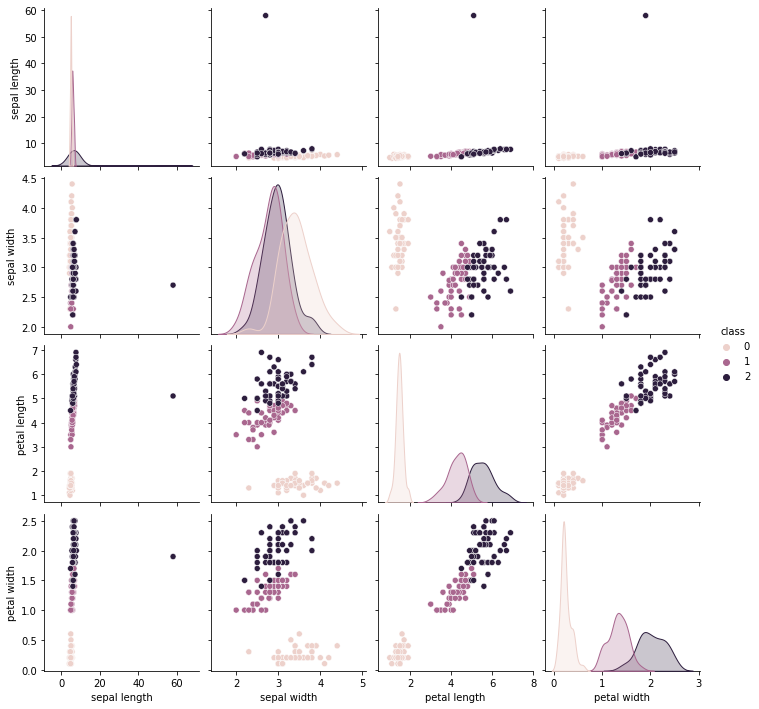

In [ ]:
sns.pairplot(df, hue="class", height=2.5)

In [ ]:
df[df['sepal length'] == 58]

,sepal length,sepal width,petal length,petal width,class
143,58.0,2.7,5.1,1.9,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


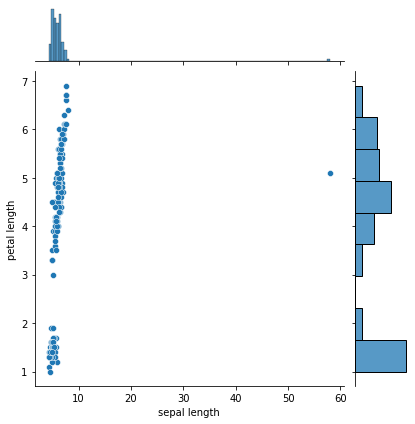

In [ ]:
sns.jointplot(df['sepal length'], df['petal length'])
plt.show()
# plt.savefig('ML_0305.png', bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


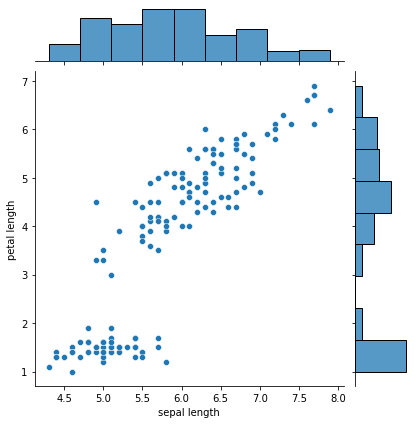

In [ ]:
df.loc[143,'sepal length'] = 5.8
sns.jointplot(df['sepal length'], df['petal length'])
plt.show()

## Dimensionsreduktion durch Feature Correlation

In [ ]:
# 4. Daten in target und features auftrennen
# Hier eine weitere mögliche Variante, wie dies gemacht werden kann
features = []
for column in df.columns:
    if column != 'class':
        features.append(column)
print(features)
print(type(features))

['sepal length', 'sepal width', 'petal length', 'petal width']
<class 'list'>


In [ ]:
# 5. target und features zuteilen
X = df[features]
Y = df['class']

In [ ]:
# 6. Feature Selection. Sollten Merkmale mittels der Pearson Correlation erkennbar deutlich korrelieren (also >0,9), so kann man überlegen, ob ein solches feature weggelassen wird, in der Betrachtung
X.corr()
# Hier korrelieren petal length und petal width mit 0,96 sehr deutlich. Petal width lassen wir daher in der Betrachtung aussen vor.
X=X.iloc[:,0:3] #Dies macht man hier per indizierten pandas-Befehl iloc[Beginnende Reihe:Endende Reihe,Beginnende Spalte:Endende Spalte]
X.head()

,sepal length,sepal width,petal length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


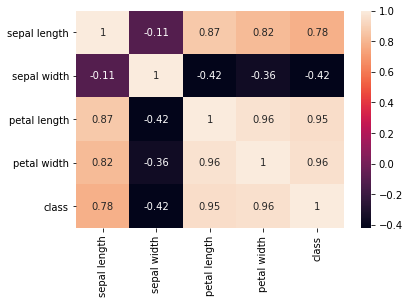

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat, annot=True)
plt.show()

## Datennormalisierung
Hier wird für jedes Feature die maximale Ausprägung ermittelt und die Skala auf 1 bis -1 reshaped/neu angewiesen.

In [ ]:
# 7. Data Normalization
#from sklearn.preprocessing import MinMaxScaler

#for column in X.columns:
#    features = np.array(X[column]).reshape(-1,1)
#    scaler = MinMaxScaler()
#    scaler.fit(features)
#    feature_scaled = scaler.transform(features)
#    X[column] = feature_scaled.reshape(1,-1)[0]

#X.head()

In [ ]:
X.describe()

,sepal length,sepal width,petal length
count,150.000000,150.000000,150.000000
mean,5.843333,3.054533,3.758667
std,0.828066,0.433205,1.764420
min,4.300000,2.000000,1.000000
25%,5.100000,2.800000,1.600000
50%,5.800000,3.000000,4.350000
75%,6.400000,3.300000,5.100000
max,7.900000,4.400000,6.900000


In [ ]:
y = label_binarize(Y, classes=[0,1,2])
n_classes = 3

In [ ]:
# 8. Datensatz splitten in Training und Test
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

## Balancing den Trainingsdatensatz

In [ ]:
#y_train.value_counts()
print('Trainingsdatensatz: %s' % Counter(y_train))

Trainingsdatensatz: Counter({1: 41, 0: 40, 2: 39})


In [ ]:
# Erstmal ein Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_bal_under, y_bal_under = under_sampler.fit_resample(X_train, y_train)
#y_bal_under.value_counts()
print('Undersampled Trainingsdatensatz: %s' % Counter(y_bal_under))

Undersampled Trainingsdatensatz: Counter({0: 39, 1: 39, 2: 39})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Und dann noch ein Oversampling
sm = SMOTE(random_state=42)
X_bal_over, y_bal_over = sm.fit_resample(X_train, y_train)
#y_bal_over.value_counts()
print('Oversampled Trainingsdatensatz: %s' % Counter(y_bal_over))

Oversampled Trainingsdatensatz: Counter({0: 41, 1: 41, 2: 41})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Modellauswahl, Training und Evaluation

In [ ]:
# Training des unbalancierten Datensatzes
model_imbalanced = KNeighborsClassifier(n_neighbors=3)
model_imbalanced.fit(X_train, y_train)
# Ermitteln der Werte im Testset
predictions_imbalanced = model_imbalanced.predict(X_test)

In [ ]:
# Evaluationsergebnisse des Trainings- und Testdatensatz
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % model_imbalanced.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions_imbalanced))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions_imbalanced))

Trainingsergebnis: 0.967
--------------------------
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Training des unbalancierten Datensatzes
model_undersampled = KNeighborsClassifier(n_neighbors=3)
model_undersampled.fit(X_train, y_train)
# Ermitteln der Werte im Testset
predictions_undersampled = model_undersampled.predict(X_test)

In [ ]:
# Evaluationsergebnisse des Trainings- und Testdatensatz
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % model_undersampled.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions_undersampled))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions_undersampled))

Trainingsergebnis: 0.967
--------------------------
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Training des unbalancierten Datensatzes
model_oversampled = KNeighborsClassifier(n_neighbors=3)
model_oversampled.fit(X_train, y_train)
# Ermitteln der Werte im Testset
predictions_oversampled = model_oversampled.predict(X_test)

In [ ]:
# Evaluationsergebnisse des Trainings- und Testdatensatz
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % model_oversampled.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions_oversampled))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions_oversampled))

Trainingsergebnis: 0.967
--------------------------
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Performance messen anhand der ROC Curve und des Precision Recalls im Testset. Es kann sein, dass eine Klasse besser abschneidet, wie die andere, da hier de imbalanced Datensatz zum Training verwendet wurde.

In [ ]:
# Und nun trainieren wir ein neuronales Netz auf die drei Datensätze
mlp_imb = MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)
mlp_und = MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)
mlp_ovr = MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)

# Das neuronale Netz wird mit den Trainingsdaten traniert
mlp_imb.fit(X_train, y_train)
mlp_und.fit(X_train, y_train)
mlp_ovr.fit(X_train, y_train)

Iteration 1, loss = 1.19237621
Iteration 2, loss = 1.13174341
Iteration 3, loss = 1.08317156
Iteration 4, loss = 1.04112486
Iteration 5, loss = 0.99363225
Iteration 6, loss = 0.94358088
Iteration 7, loss = 0.90117930
Iteration 8, loss = 0.86753945
Iteration 9, loss = 0.84092333
Iteration 10, loss = 0.81564873
Iteration 11, loss = 0.79212977
Iteration 12, loss = 0.77068637
Iteration 13, loss = 0.74636823
Iteration 14, loss = 0.72531919
Iteration 15, loss = 0.70473686
Iteration 16, loss = 0.68582685
Iteration 17, loss = 0.66843777
Iteration 18, loss = 0.64993595
Iteration 19, loss = 0.63406339
Iteration 20, loss = 0.61816023
Iteration 21, loss = 0.60405105
Iteration 22, loss = 0.58981080
Iteration 23, loss = 0.57748582
Iteration 24, loss = 0.56511766
Iteration 25, loss = 0.55581461
Iteration 26, loss = 0.54204295
Iteration 27, loss = 0.53193233
Iteration 28, loss = 0.52216355
Iteration 29, loss = 0.51286982
Iteration 30, loss = 0.50448297
Iteration 31, loss = 0.49527289
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 38, loss = 0.45592986
Iteration 39, loss = 0.44639135
Iteration 40, loss = 0.43721237
Iteration 41, loss = 0.42910484
Iteration 42, loss = 0.42296972
Iteration 43, loss = 0.41335341
Iteration 44, loss = 0.40625684
Iteration 45, loss = 0.39770177
Iteration 46, loss = 0.38960537
Iteration 47, loss = 0.38373802
Iteration 48, loss = 0.37609530
Iteration 49, loss = 0.36841107
Iteration 50, loss = 0.36168257
Iteration 51, loss = 0.35545694
Iteration 52, loss = 0.35080611
Iteration 53, loss = 0.34169085
Iteration 54, loss = 0.33707711
Iteration 55, loss = 0.32977939
Iteration 56, loss = 0.32296266
Iteration 57, loss = 0.31688037
Iteration 58, loss = 0.30729954
Iteration 59, loss = 0.29475043
Iteration 60, loss = 0.28700388
Iteration 61, loss = 0.27622725
Iteration 62, loss = 0.27101198
Iteration 63, loss = 0.26252253
Iteration 64, loss = 0.25886778
Iteration 65, loss = 0.25713232
Iteration 66, loss = 0.24888697
Iteration 67, loss = 0.24416202
Iteration 68, loss = 0.24079713
Iteratio

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=350,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
# Evaluationsergebnisse des Trainings- und Testdatensatz
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp_imb.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions_oversampled))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions_oversampled))

Trainingsergebnis: 0.967
--------------------------
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Evaluationsergebnisse des Trainings- und Testdatensatz
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp_und.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions_oversampled))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions_oversampled))

Trainingsergebnis: 0.967
--------------------------
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Evaluationsergebnisse des Trainings- und Testdatensatz
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp_ovr.score(X_train, y_train))
print("--------------------------")
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions_oversampled))
print("--------------------------")
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions_oversampled))

Trainingsergebnis: 0.967
--------------------------
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
--------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Das Modell wird beispielsweise zur Vorhersage auf folgenden Werten
# aus dem Testset angewandt mit den Merkmalen [sepal-length, sepal-width,
# petal-length]
print(model_imbalanced.predict([[5.1,3.5,1.4], [5.9,3.,5.1], [4.9,3.,1.4]]))
print(model_undersampled.predict([[5.1,3.5,1.4], [5.9,3.,5.1], [4.9,3.,1.4]]))
print(model_oversampled.predict([[5.1,3.5,1.4], [5.9,3.,5.1], [4.9,3.,1.4]]))
print(mlp_imb.predict([[5.1,3.5,1.4], [5.9,3.,5.1], [4.9,3.,1.4]]))
print(mlp_und.predict([[5.1,3.5,1.4], [5.9,3.,5.1], [4.9,3.,1.4]]))
print(mlp_ovr.predict([[5.1,3.5,1.4], [5.9,3.,5.1], [4.9,3.,1.4]]))

[0 2 0]
[0 2 0]
[0 2 0]
[0 2 0]
[0 2 0]
[0 2 0]


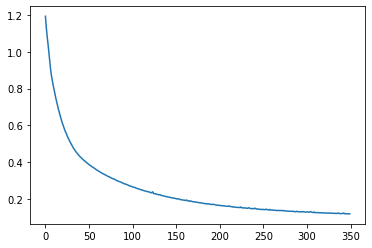

In [ ]:
# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp_imb.loss_curve_
plt.plot(loss_values)
plt.savefig("./Plot_of_loss_values0.png")
plt.show()

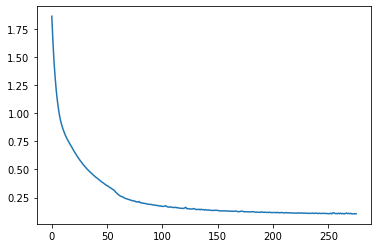

In [ ]:
loss_values = mlp_und.loss_curve_
plt.plot(loss_values)
plt.savefig("./Plot_of_loss_values1.png")
plt.show()

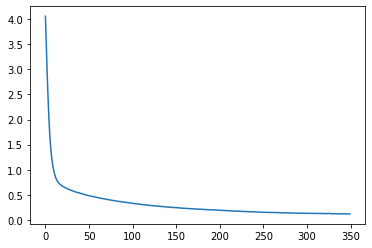

In [ ]:
loss_values = mlp_ovr.loss_curve_
plt.plot(loss_values)
plt.savefig("./Plot_of_loss_values2.png")
plt.show()